In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('ggplot')

In [54]:
bank = pd.read_csv("/home/jvfe/Documentos/ml4-data/bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [13]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [14]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [17]:
bank["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [55]:
bank2 = bank.copy()

In [56]:
bank2['job'] = bank2['job'].replace(['management', 'admin.'], 'white-collar')
bank2['job'] = bank2['job'].replace(['services','housemaid'], 'pink-collar')
bank2['job'] = bank2['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')
bank2["job"].value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [57]:
bank2.drop('contact', axis=1, inplace=True)
bank2.drop('month', axis=1, inplace=True)
bank2.drop('day', axis=1, inplace=True)
bank2.drop('pdays', axis=1, inplace=True)

In [58]:
bank2["loanfac"] = bank2['loan'].map({'yes':1, 'no':0})
bank2.drop('loan', axis=1, inplace=True)

bank2["depositfac"] = bank2['deposit'].map({'yes':1, 'no':0})
bank2.drop('deposit', axis=1, inplace=True)

bank2["housingfac"]=bank2['housing'].map({'yes':1, 'no':0})
bank2.drop('housing', axis=1,inplace = True)

bank2['defaultfac'] = bank2['default'].map({'yes':1, 'no':0})
bank2.drop('default', axis=1,inplace = True)

In [59]:
bank2.head()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,loanfac,depositfac,housingfac,defaultfac
0,59,white-collar,married,secondary,2343,1042,1,0,unknown,0,1,1,0
1,56,white-collar,married,secondary,45,1467,1,0,unknown,0,1,0,0
2,41,technician,married,secondary,1270,1389,1,0,unknown,0,1,1,0
3,55,pink-collar,married,secondary,2476,579,1,0,unknown,0,1,1,0
4,54,white-collar,married,tertiary,184,673,2,0,unknown,0,1,0,0


In [60]:
bank_dumb = pd.get_dummies(data=bank2, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_dumb.head()

,age,balance,duration,campaign,previous,loanfac,depositfac,housingfac,defaultfac,job_blue-collar,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,56,45,1467,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,41,1270,1389,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,55,2476,579,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,54,184,673,2,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


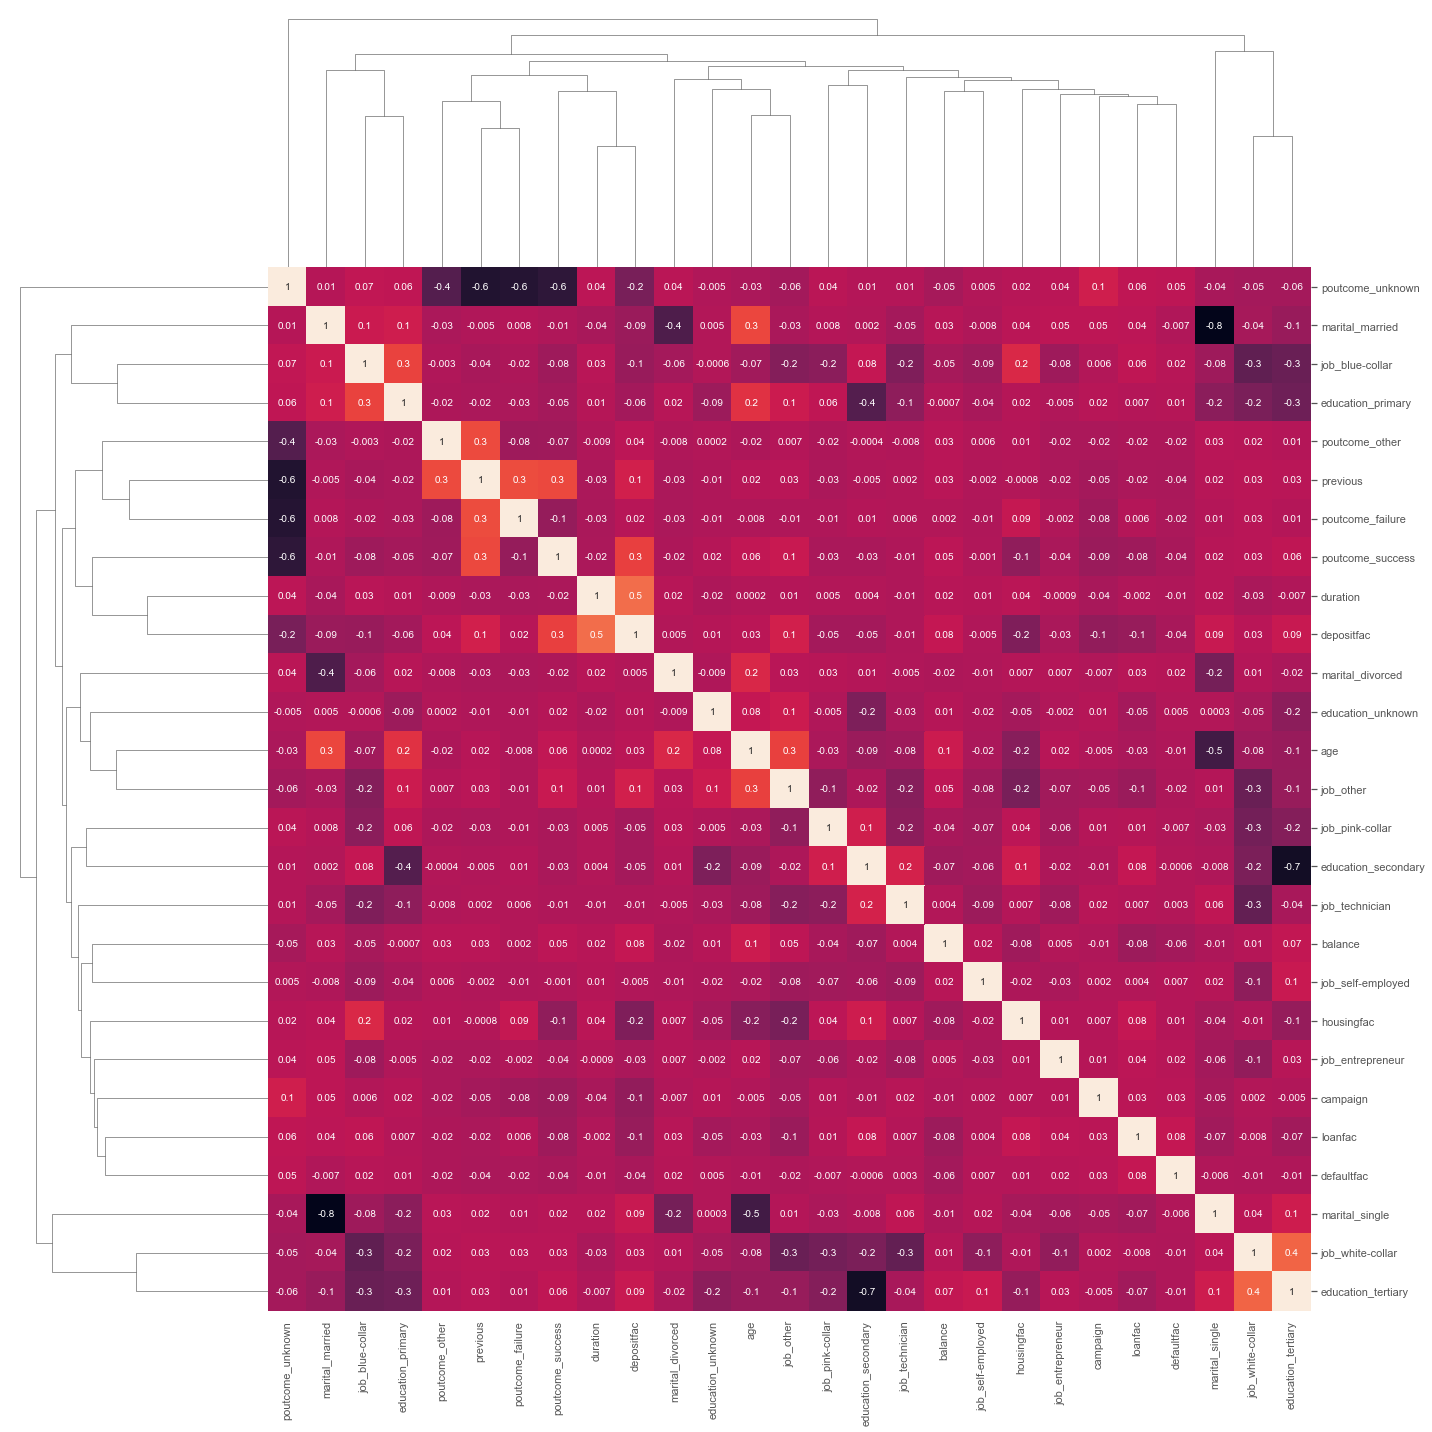

In [61]:
sns.clustermap(bank_dumb.corr(), figsize=(20,20), annot=True, fmt='.1g', cbar_pos=None)
plt.show()

In [68]:
bcor = bank_dumb.corr()
pd.DataFrame(bcor['depositfac']).sort_values(by = 'depositfac',
                                             ascending=False)

,depositfac
depositfac,1.000000
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
poutcome_other,0.044059
age,0.034901


In [70]:
y = bank_dumb['depositfac']
X = bank_dumb.drop('depositfac', axis=1)
X

,age,balance,duration,campaign,previous,loanfac,housingfac,defaultfac,job_blue-collar,job_entrepreneur,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,54,184,673,2,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,1
11158,39,733,83,4,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
11159,32,29,156,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
11160,43,0,9,2,5,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [71]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: depositfac, Length: 11162, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
forest.score(X_test, y_test)

0.8029556650246306

In [84]:
importance = pd.DataFrame(forest.feature_importances_)
importance['features'] = list(X)
importance

,0,features
0,0.123588,age
1,0.138692,balance
2,0.399952,duration
3,0.053702,campaign
4,0.038283,previous
5,0.014086,loanfac
6,0.038176,housingfac
7,0.001983,defaultfac
8,0.009989,job_blue-collar
9,0.004155,job_entrepreneur
